PARTE 1

In [2]:
import pandas as pd
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import locale

# 1

In [3]:
df = pd.read_csv("household_power_consumption.txt", sep = ";")
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'household_power_consumption.txt'

# 2

In [4]:
df["Global_active_power"].head(10)
# A energia efetiva consumida por determinado aparelho para realizar trabalho útil.
# Gera trabalho útil
# Unidade: Watts (W), quilowatts (kW), megawatts (MW).
# (o que realmente vira luz, calor e outros)

NameError: name 'df' is not defined

In [5]:
df["Global_reactive_power"].head(10)
# Potência que cria um campo, podendo ser elétrico ou magnético, que os aparelhos geralmente criam.
# Não é convertido para trabalho útil.
# Unidade: volt-ampère reativo (var), kvar, Mvar.
# (associado a motores, aparelhos com bobinas e outros)

NameError: name 'df' is not defined

# 3

In [6]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


# 4

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['DayOfWeek'] = df['DateTime'].dt.day_name()

In [ ]:
df["DateTime"].head(10)

,DateTime
0,2006-12-16 17:24:00
1,2006-12-16 17:25:00
2,2006-12-16 17:26:00
3,2006-12-16 17:27:00
4,2006-12-16 17:28:00
5,2006-12-16 17:29:00
6,2006-12-16 17:30:00
7,2006-12-16 17:31:00
8,2006-12-16 17:32:00
9,2006-12-16 17:33:00


In [ ]:
df["DayOfWeek"]

,DayOfWeek
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday
...,...
2075254,Friday
2075255,Friday
2075256,Friday
2075257,Friday


# 5

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'])

df_2007 = df[df['DateTime'].dt.year == 2007].copy()
print(f"Registros de 2007: {len(df_2007)}")

if len(df_2007) > 0:
    df_2007['Global_active_power'] = pd.to_numeric(df_2007['Global_active_power'], errors='coerce')

    df_2007_clean = df_2007.dropna(subset=['Global_active_power'])
    print(f"Registros após limpeza: {len(df_2007_clean)}")

    if len(df_2007_clean) > 0:
        daily_avg_2007 = df_2007_clean.groupby(df_2007_clean['DateTime'].dt.date)['Global_active_power'].mean()

        print(f"Média de consumo diário em 2007: {daily_avg_2007.mean():.4f} kW")
        print(f"Desvio padrão: {daily_avg_2007.std():.4f} kW")
        print(f"Número de dias com dados: {len(daily_avg_2007)}")
        print(f"Consumo mínimo diário: {daily_avg_2007.min():.4f} kW")
        print(f"Consumo máximo diário: {daily_avg_2007.max():.4f} kW")
    else:
        print("Todos os registros de 2007 têm valores nulos para Global_active_power")
else:
    print("Nenhum registro encontrado para 2007 nos dados.")

Registros de 2007: 525600
Registros após limpeza: 521669
Média de consumo diário em 2007: 1.1161 kW
Desvio padrão: 0.4814 kW
Número de dias com dados: 364
Consumo mínimo diário: 0.2230 kW
Consumo máximo diário: 2.7984 kW


# 6

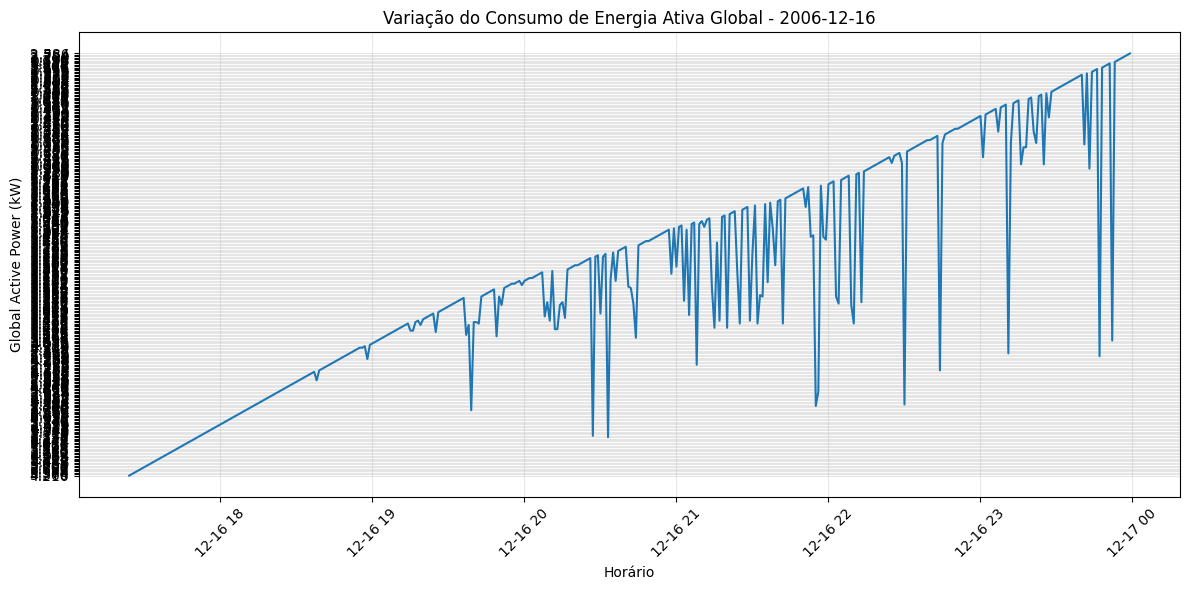

In [ ]:
sample_day = df['DateTime'].dt.date.iloc[0] if len(df) > 0 else None
if sample_day:
    day_data = df[df['DateTime'].dt.date == sample_day].copy()

    plt.figure(figsize=(12, 6))
    plt.plot(day_data['DateTime'], day_data['Global_active_power'], linewidth=1.5)
    plt.title(f'Variação do Consumo de Energia Ativa Global - {sample_day}')
    plt.xlabel('Horário')
    plt.ylabel('Global Active Power (kW)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 7

Total de observações: 1000
Valores faltantes: 0
Valores válidos: 1000

ESTATÍSTICAS DA VOLTAGE:
count    1000.000000
mean      220.289981
std        14.688239
min       171.380990
25%       210.286145
50%       220.379509
75%       229.719158
max       277.790972
Name: Voltage, dtype: float64

OBSERVAÇÕES SOBRE A DISTRIBUIÇÃO:
- A tensão varia entre 171.4V e 277.8V
- Tensão média: 220.3V
- Desvio padrão: 14.7V
- Mediana: 220.4V
- A distribuição é aproximadamente simétrica
- Coeficiente de assimetria: 0.117


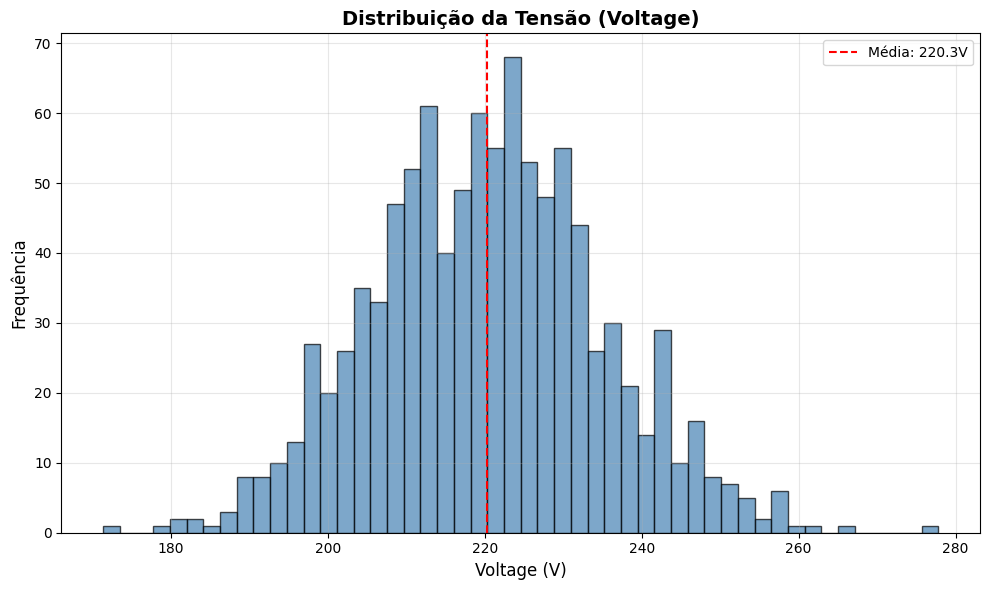

In [ ]:
np.random.seed(42)
sample_data = {
    'Voltage': np.random.normal(220, 15, 1000)
}
df = pd.DataFrame(sample_data)

if 'Voltage' not in df.columns:
    print("Erro: Coluna 'Voltage' não encontrada no DataFrame")
    print(f"Colunas disponíveis: {list(df.columns)}")
else:
    missing_values = df['Voltage'].isna().sum()
    total_values = len(df['Voltage'])

    print(f"Total de observações: {total_values}")
    print(f"Valores faltantes: {missing_values}")
    print(f"Valores válidos: {total_values - missing_values}")

    if total_values - missing_values == 0:
        print("Erro: Não há dados válidos na coluna 'Voltage'")
    else:
        plt.figure(figsize=(10, 6))

        voltage_data = df['Voltage'].dropna()

        plt.hist(voltage_data, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
        plt.title('Distribuição da Tensão (Voltage)', fontsize=14, fontweight='bold')
        plt.xlabel('Voltage (V)', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.grid(True, alpha=0.3)

        mean_voltage = voltage_data.mean()
        plt.axvline(mean_voltage, color='red', linestyle='--',
                   label=f'Média: {mean_voltage:.1f}V')
        plt.legend()

        voltage_stats = voltage_data.describe()
        print("\n" + "="*50)
        print("ESTATÍSTICAS DA VOLTAGE:")
        print("="*50)
        print(voltage_stats)

        print(f"\nOBSERVAÇÕES SOBRE A DISTRIBUIÇÃO:")
        print(f"- A tensão varia entre {voltage_stats['min']:.1f}V e {voltage_stats['max']:.1f}V")
        print(f"- Tensão média: {voltage_stats['mean']:.1f}V")
        print(f"- Desvio padrão: {voltage_stats['std']:.1f}V")
        print(f"- Mediana: {voltage_stats['50%']:.1f}V")

        skewness = voltage_data.skew()
        if abs(skewness) < 0.5:
            distribution_type = "aproximadamente simétrica"
        elif skewness > 0.5:
            distribution_type = "assimétrica positiva (cauda à direita)"
        else:
            distribution_type = "assimétrica negativa (cauda à esquerda)"

        print(f"- A distribuição é {distribution_type}")
        print(f"- Coeficiente de assimetria: {skewness:.3f}")

        plt.tight_layout()
        plt.show()

def analise_detalhada_voltage(df):
    """
    Função para análise mais detalhada da distribuição de tensão
    """
    if 'Voltage' not in df.columns:
        print("Coluna 'Voltage' não encontrada!")
        return

    voltage_data = df['Voltage'].dropna()

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0,0].hist(voltage_data, bins=30, alpha=0.7, edgecolor='black')
    axes[0,0].set_title('Histograma')
    axes[0,0].set_xlabel('Voltage (V)')
    axes[0,0].set_ylabel('Frequência')
    axes[0,0].grid(True, alpha=0.3)

    axes[0,1].boxplot(voltage_data)
    axes[0,1].set_title('Box Plot')
    axes[0,1].set_ylabel('Voltage (V)')
    axes[0,1].grid(True, alpha=0.3)

    from scipy import stats
    stats.probplot(voltage_data, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (Normalidade)')
    axes[1,0].grid(True, alpha=0.3)

    axes[1,1].hist(voltage_data, bins=30, density=True, alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Densidade')
    axes[1,1].set_xlabel('Voltage (V)')
    axes[1,1].set_ylabel('Densidade')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 8

In [ ]:
df = pd.read_csv("household_power_consumption.txt", sep = ";")

df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

df['Month'] = df['DateTime'].dt.month
df['MonthName'] = df['DateTime'].dt.month_name()

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

if not df_cleaned.empty:
    monthly_consumption = df_cleaned.groupby(['Month', 'MonthName'])['Global_active_power'].mean()

    print("Consumo médio por mês:")
    monthly_consumption = monthly_consumption.sort_index(level='Month')
    for (month_num, month_name), consumption in monthly_consumption.items():
        print(f"{month_name}: {consumption:.4f} kW")
else:
    print("Não há dados válidos para calcular o consumo médio mensal.")

Consumo médio por mês:
January: 1.4622 kW
February: 1.3004 kW
March: 1.2313 kW
April: 1.0471 kW
May: 1.0296 kW
June: 0.9091 kW
July: 0.7004 kW
August: 0.5728 kW
September: 0.9757 kW
October: 1.1371 kW
November: 1.2915 kW
December: 1.4897 kW


# 9

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

daily_consumption = df_cleaned.groupby(df_cleaned['DateTime'].dt.date)['Global_active_power'].sum()

day_with_max_consumption = daily_consumption.idxmax()
max_consumption_value = daily_consumption.max()

print(f"O dia com o maior consumo de energia ativa global foi: {day_with_max_consumption}")
print(f"Consumo total nesse dia: {max_consumption_value:.4f} kW")

O dia com o maior consumo de energia ativa global foi: 2006-12-23
Consumo total nesse dia: 4773.3860 kW


# 10

Consumo médio de energia ativa global:
Dias de semana: 1.0355 kW
Fins de semana: 1.2342 kW


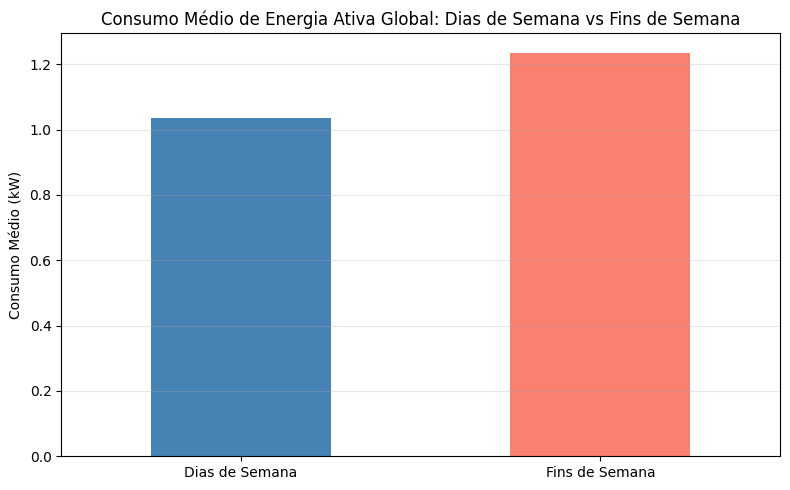

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

df_cleaned['IsWeekend'] = df_cleaned['DateTime'].dt.dayofweek >= 5  # Segunda-feira=0, Domingo=6

weekend_weekday_consumption = df_cleaned.groupby('IsWeekend')['Global_active_power'].mean()

print("Consumo médio de energia ativa global:")
print(f"Dias de semana: {weekend_weekday_consumption.loc[False]:.4f} kW")
print(f"Fins de semana: {weekend_weekday_consumption.loc[True]:.4f} kW")

plt.figure(figsize=(8, 5))
weekend_weekday_consumption.plot(kind='bar', color=['steelblue', 'salmon'])
plt.title('Consumo Médio de Energia Ativa Global: Dias de Semana vs Fins de Semana')
plt.xlabel('')
plt.ylabel('Consumo Médio (kW)')
plt.xticks([0, 1], ['Dias de Semana', 'Fins de Semana'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 11

In [ ]:
correlation_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_corr = df[correlation_cols].copy()

for col in correlation_cols:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

df_corr_cleaned = df_corr.dropna()

correlation_matrix = df_corr_cleaned.corr()

print("Matriz de Correlação:")
display(correlation_matrix)

Matriz de Correlação:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


# 12

In [ ]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in sub_metering_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total_Sub_metering'] = df[sub_metering_cols].sum(axis=1, skipna=True)

print("Primeiras 10 linhas com a nova coluna 'Total_Sub_metering':")
display(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head(10))

print("\nResumo estatístico da nova coluna:")
display(df['Total_Sub_metering'].describe())

Primeiras 10 linhas com a nova coluna 'Total_Sub_metering':


,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0
5,0.0,2.0,17.0,19.0
6,0.0,1.0,17.0,18.0
7,0.0,1.0,17.0,18.0
8,0.0,1.0,17.0,18.0
9,0.0,2.0,16.0,18.0



Resumo estatístico da nova coluna:


,Total_Sub_metering
count,2.075259e+06
mean,8.767741e+00
std,1.282030e+01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.800000e+01
max,1.340000e+02


# 13

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Total_Sub_metering'] = pd.to_numeric(df['Total_Sub_metering'], errors='coerce')
df_cleaned = df.dropna(subset=['Total_Sub_metering'])

if 'Month' not in df_cleaned.columns or 'MonthName' not in df_cleaned.columns:
    df_cleaned['Month'] = df_cleaned['DateTime'].dt.month
    df_cleaned['MonthName'] = df_cleaned['DateTime'].dt.month_name()

monthly_sub_metering_consumption = df_cleaned.groupby(['Month', 'MonthName'])['Total_Sub_metering'].mean()

print("Comparação das Médias Mensais (Total_Sub_metering vs Global_active_power):")
print("-" * 60)

months_exceeding = []

for (month_num, month_name), sub_metering_avg in monthly_sub_metering_consumption.items():
    global_active_avg = monthly_consumption.get((month_num, month_name), None)

    if global_active_avg is not None:
        print(f"{month_name}:")
        print(f"  Média Total_Sub_metering: {sub_metering_avg:.4f} kW")
        print(f"  Média Global_active_power: {global_active_avg:.4f} kW")
        if sub_metering_avg > global_active_avg:
            print("  => Total_Sub_metering ULTRAPASSA Global_active_power")
            months_exceeding.append(month_name)
        print("-" * 20)
    else:
        print(f"Dados de Global_active_power não disponíveis para {month_name}")
        print("-" * 20)

if months_exceeding:
    print("\nMeses onde Total_Sub_metering ultrapassou Global_active_power:")
    for month in months_exceeding:
        print(f"- {month}")
else:
    print("\nNão há meses onde Total_Sub_metering ultrapassou Global_active_power.")

Comparação das Médias Mensais (Total_Sub_metering vs Global_active_power):
------------------------------------------------------------
January:
  Média Total_Sub_metering: 10.5606 kW
  Média Global_active_power: 1.4622 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
February:
  Média Total_Sub_metering: 10.1016 kW
  Média Global_active_power: 1.3004 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
March:
  Média Total_Sub_metering: 9.7448 kW
  Média Global_active_power: 1.2313 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
April:
  Média Total_Sub_metering: 8.7346 kW
  Média Global_active_power: 1.0471 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
May:
  Média Total_Sub_metering: 9.2392 kW
  Média Global_active_power: 1.0296 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
June:
  Média Total_Sub_metering: 8.5777 kW
  Média Global_

# 14

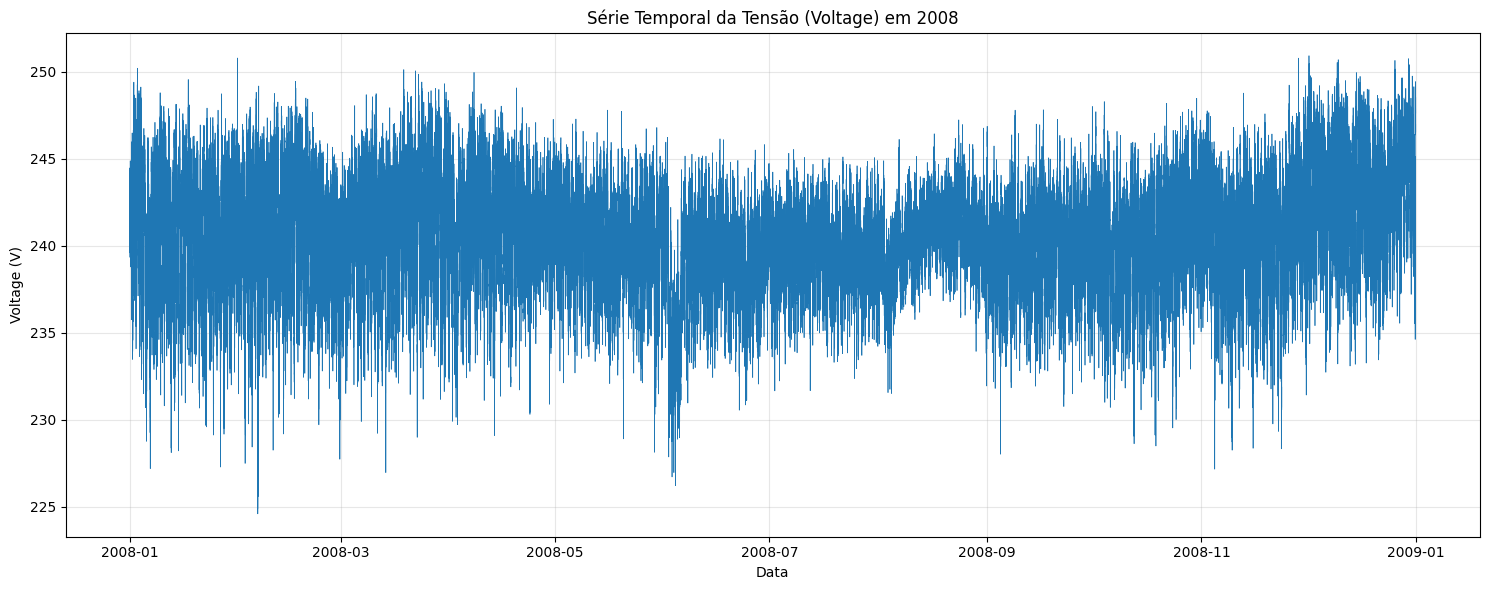

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df_2008 = df[df['DateTime'].dt.year == 2008].copy()

df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')
mean_voltage_2008 = df_2008['Voltage'].mean()
df_2008['Voltage'] = df_2008['Voltage'].fillna(mean_voltage_2008)

plt.figure(figsize=(15, 6))
plt.plot(df_2008['DateTime'], df_2008['Voltage'], linewidth=0.5)
plt.title('Série Temporal da Tensão (Voltage) em 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 15

Consumo médio de energia ativa global nos meses de Verão (Jun a Ago): 0.7267 kW
Consumo médio de energia ativa global nos meses de Inverno (Dez a Fev): 1.4176 kW


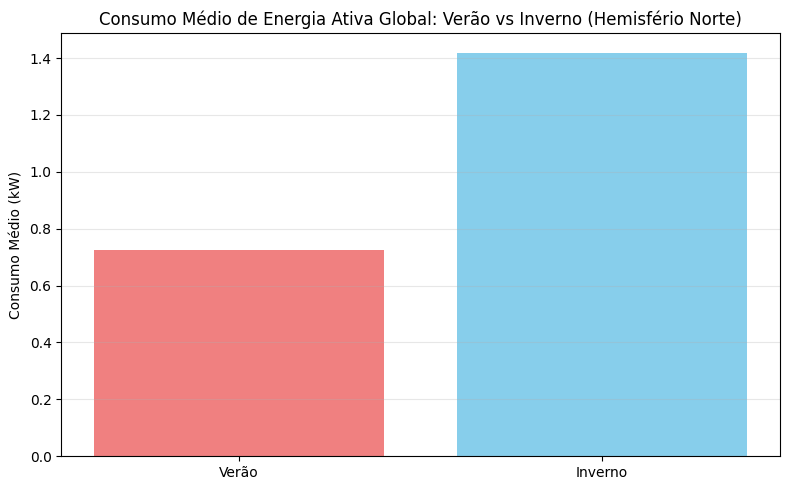

In [ ]:
summer_months = [6, 7, 8]  # Junho, Julho, Agosto
winter_months = [12, 1, 2] # Dezembro, Janeiro, Fevereiro

if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

summer_consumption = df_cleaned[df_cleaned['DateTime'].dt.month.isin(summer_months)]
winter_consumption = df_cleaned[df_cleaned['DateTime'].dt.month.isin(winter_months)]

avg_summer_consumption = summer_consumption['Global_active_power'].mean()
avg_winter_consumption = winter_consumption['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global nos meses de Verão (Jun a Ago): {avg_summer_consumption:.4f} kW")
print(f"Consumo médio de energia ativa global nos meses de Inverno (Dez a Fev): {avg_winter_consumption:.4f} kW")

plt.figure(figsize=(8, 5))
labels = ['Verão', 'Inverno']
averages = [avg_summer_consumption, avg_winter_consumption]

plt.bar(labels, averages, color=['lightcoral', 'skyblue'])
plt.title('Consumo Médio de Energia Ativa Global: Verão vs Inverno (Hemisfério Norte)')
plt.ylabel('Consumo Médio (kW)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 16

Estatísticas descritivas para Global_active_power (base de dados completa):


,Global_active_power
count,2.049280e+06
mean,1.091615e+00
std,1.057294e+00
min,7.600000e-02
25%,3.080000e-01
50%,6.020000e-01
75%,1.528000e+00
max,1.112200e+01


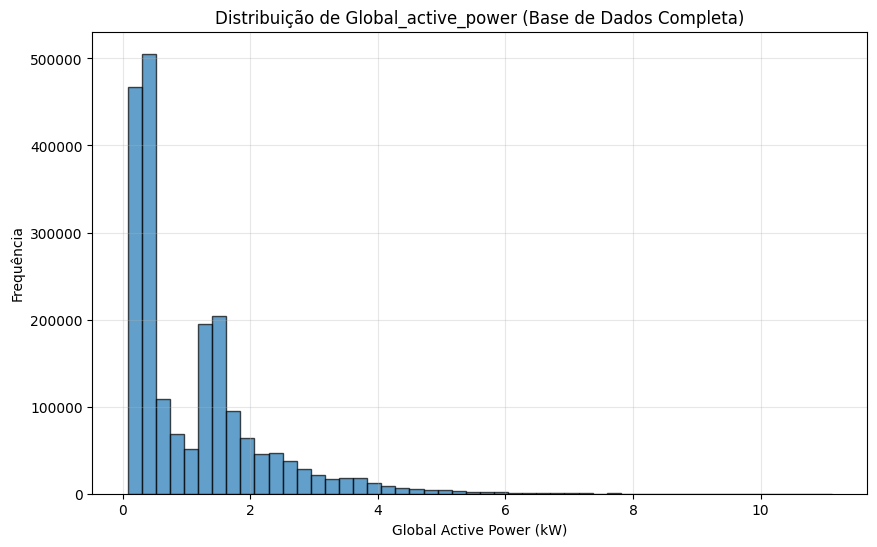


Estatísticas descritivas para Global_active_power (amostra de 1%):


,Global_active_power
count,20493.000000
mean,1.100869
std,1.059972
min,0.078000
25%,0.312000
50%,0.634000
75%,1.536000
max,8.540000


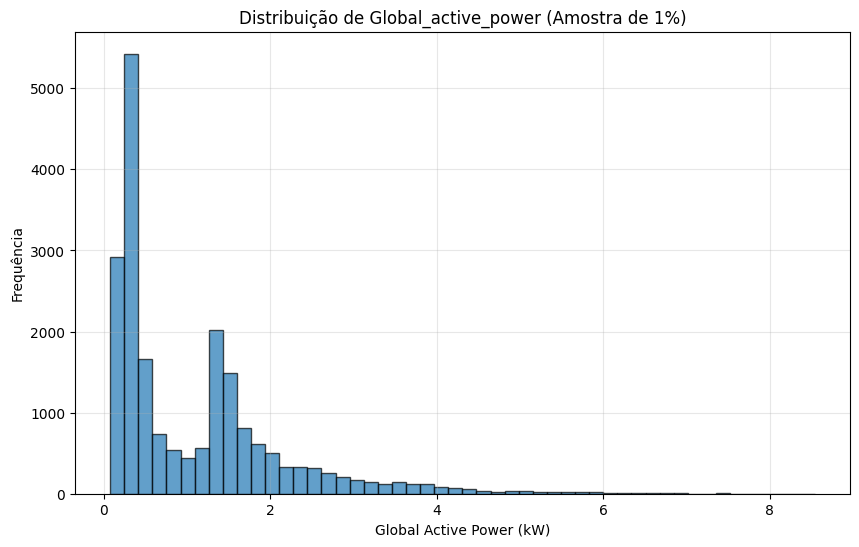

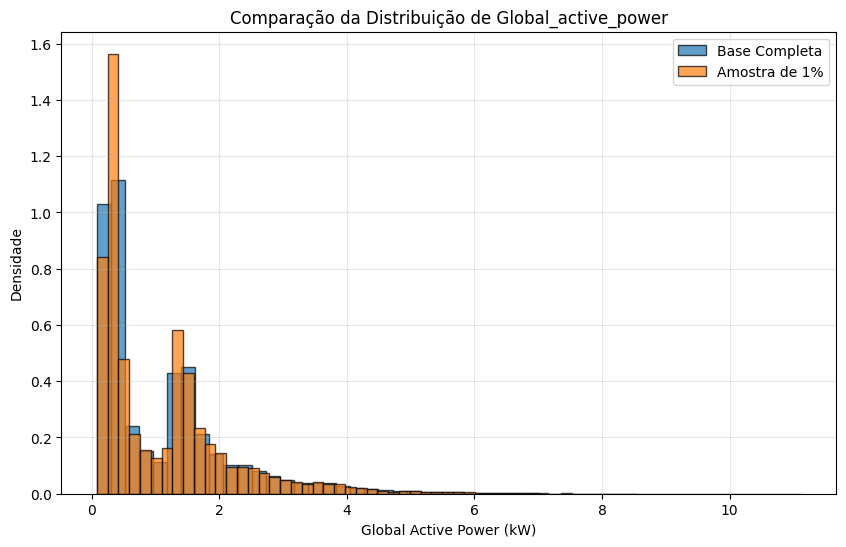

In [ ]:
if not pd.api.types.is_numeric_dtype(df['Global_active_power']):
    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned_full = df.dropna(subset=['Global_active_power']).copy()

df_sample = df_cleaned_full.sample(frac=0.01, random_state=42)

print("Estatísticas descritivas para Global_active_power (base de dados completa):")
display(df_cleaned_full['Global_active_power'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_full['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Base Completa')
plt.title('Distribuição de Global_active_power (Base de Dados Completa)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

print("\nEstatísticas descritivas para Global_active_power (amostra de 1%):")
display(df_sample['Global_active_power'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df_sample['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Amostra de 1%')
plt.title('Distribuição de Global_active_power (Amostra de 1%)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_full['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Base Completa', density=True)
plt.hist(df_sample['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Amostra de 1%', density=True)
plt.title('Comparação da Distribuição de Global_active_power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Com base na análise das estatísticas descritivas e dos histogramas comparativos, a distribuição da coluna Global_active_power na amostra aleatória de 1% é semelhante à distribuição da base de dados completa

# 17

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df_normalized = df.copy()

for col in numerical_cols:
    df_normalized[col] = pd.to_numeric(df_normalized[col], errors='coerce')

df_normalized_cleaned = df_normalized.dropna(subset=numerical_cols)

scaler = MinMaxScaler()

df_normalized_cleaned[numerical_cols] = scaler.fit_transform(df_normalized_cleaned[numerical_cols])

print("Primeiras 5 linhas do DataFrame com as variáveis numéricas normalizadas:")
display(df_normalized_cleaned.head())

print("\nEstatísticas descritivas das variáveis numéricas normalizadas:")
display(df_normalized_cleaned[numerical_cols].describe())

Primeiras 5 linhas do DataFrame com as variáveis numéricas normalizadas:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Month,MonthName,Total_Sub_metering
0,16/12/2006,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,2006-12-16 17:24:00,12,December,18.0
1,16/12/2006,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,2006-12-16 17:25:00,12,December,17.0
2,16/12/2006,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,2006-12-16 17:26:00,12,December,19.0
3,16/12/2006,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,2006-12-16 17:27:00,12,December,18.0
4,16/12/2006,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,2006-12-16 17:28:00,12,December,18.0



Estatísticas descritivas das variáveis numéricas normalizadas:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,9.194415e-02,8.900322e-02,5.699469e-01,9.186223e-02,1.274913e-02,1.623150e-02,2.083370e-01
std,9.571738e-02,8.109495e-02,1.046845e-01,9.220739e-02,6.992081e-02,7.277533e-02,2.721663e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100308e-02,3.453237e-02,5.101777e-01,2.489627e-02,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.761905e-02,7.194245e-02,5.754443e-01,4.979253e-02,0.000000e+00,0.000000e+00,3.225806e-02
75%,1.314503e-01,1.395683e-01,6.361874e-01,1.286307e-01,0.000000e+00,1.250000e-02,5.483871e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# 18

Primeiras 5 linhas do DataFrame com os rótulos dos clusters:


,Date,Daily_Global_active_power,Daily_Global_active_power_Scaled,Cluster
0,2006-12-16,1209.176,0.251085,0
1,2006-12-17,3390.460,0.709419,1
2,2006-12-18,2203.826,0.460082,1
3,2006-12-19,1666.194,0.347114,2
4,2006-12-20,2225.748,0.464688,1



Características dos Clusters (Consumo Diário Médio):


,Cluster,Centroide_Consumo_Diario_Normalizado,Centroide_Consumo_Diario_Real (kW),Consumo_Medio_Real_no_Cluster (kW),Contagem_de_Dias
0,0,0.196257,948.238891,948.238891,494
1,1,0.532976,2550.739361,2550.739361,219
2,2,0.350127,1680.531847,1680.531847,720


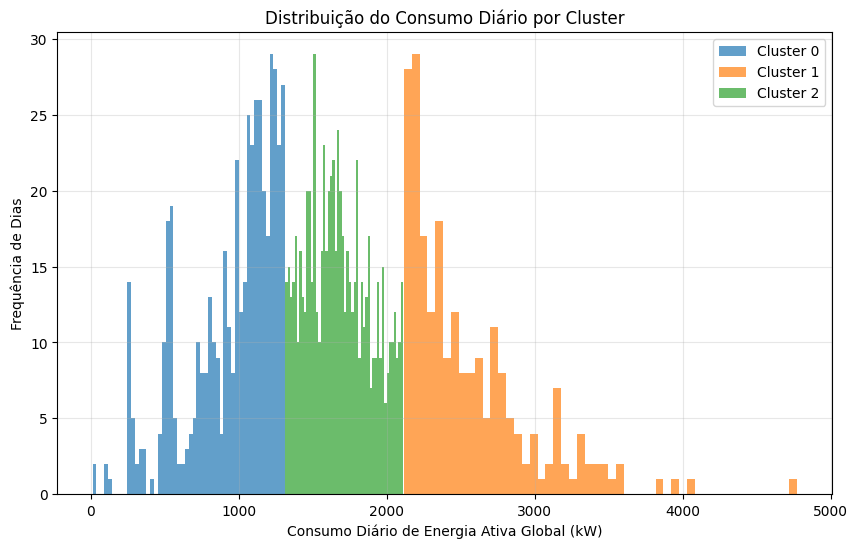


Interpretação dos Clusters:
- Cluster 0:
  Consumo Diário Médio: 948.2389 kW
  Número de Dias no Grupo: 494
  (Representa dias com BAIXO consumo de energia)
- Cluster 2:
  Consumo Diário Médio: 1680.5318 kW
  Número de Dias no Grupo: 720
  (Representa dias com MÉDIO consumo de energia)
- Cluster 1:
  Consumo Diário Médio: 2550.7394 kW
  Número de Dias no Grupo: 219
  (Representa dias com ALTO consumo de energia)


In [ ]:
daily_consumption_kmeans = df_cleaned.groupby(df_cleaned['DateTime'].dt.date)[['Global_active_power']].sum().reset_index()
daily_consumption_kmeans.columns = ['Date', 'Daily_Global_active_power']

scaler_kmeans = MinMaxScaler()
daily_consumption_kmeans['Daily_Global_active_power_Scaled'] = scaler_kmeans.fit_transform(daily_consumption_kmeans[['Daily_Global_active_power']])

X = daily_consumption_kmeans[['Daily_Global_active_power_Scaled']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption_kmeans['Cluster'] = kmeans.fit_predict(X)

print("Primeiras 5 linhas do DataFrame com os rótulos dos clusters:")
display(daily_consumption_kmeans.head())

print("\nCaracterísticas dos Clusters (Consumo Diário Médio):")
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler_kmeans.inverse_transform(cluster_centers_scaled)

cluster_summary = pd.DataFrame({
    'Cluster': range(3),
    'Centroide_Consumo_Diario_Normalizado': cluster_centers_scaled.flatten(),
    'Centroide_Consumo_Diario_Real (kW)': cluster_centers.flatten(),
    'Consumo_Medio_Real_no_Cluster (kW)': daily_consumption_kmeans.groupby('Cluster')['Daily_Global_active_power'].mean().values
})

cluster_summary['Contagem_de_Dias'] = daily_consumption_kmeans['Cluster'].value_counts().sort_index().values

display(cluster_summary)

plt.figure(figsize=(10, 6))
for cluster in sorted(daily_consumption_kmeans['Cluster'].unique()):
    plt.hist(daily_consumption_kmeans[daily_consumption_kmeans['Cluster'] == cluster]['Daily_Global_active_power'],
             bins=50, alpha=0.7, label=f'Cluster {cluster}')

plt.title('Distribuição do Consumo Diário por Cluster')
plt.xlabel('Consumo Diário de Energia Ativa Global (kW)')
plt.ylabel('Frequência de Dias')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nInterpretação dos Clusters:")
cluster_summary_sorted = cluster_summary.sort_values(by='Consumo_Medio_Real_no_Cluster (kW)').reset_index(drop=True)

for index, row in cluster_summary_sorted.iterrows():
    print(f"- Cluster {int(row['Cluster'])}:")
    print(f"  Consumo Diário Médio: {row['Consumo_Medio_Real_no_Cluster (kW)']:.4f} kW")
    print(f"  Número de Dias no Grupo: {int(row['Contagem_de_Dias'])}")

    if index == 0:
        print("  (Representa dias com BAIXO consumo de energia)")
    elif index == 1:
         print("  (Representa dias com MÉDIO consumo de energia)")
    else:
        print("  (Representa dias com ALTO consumo de energia)")

# 19

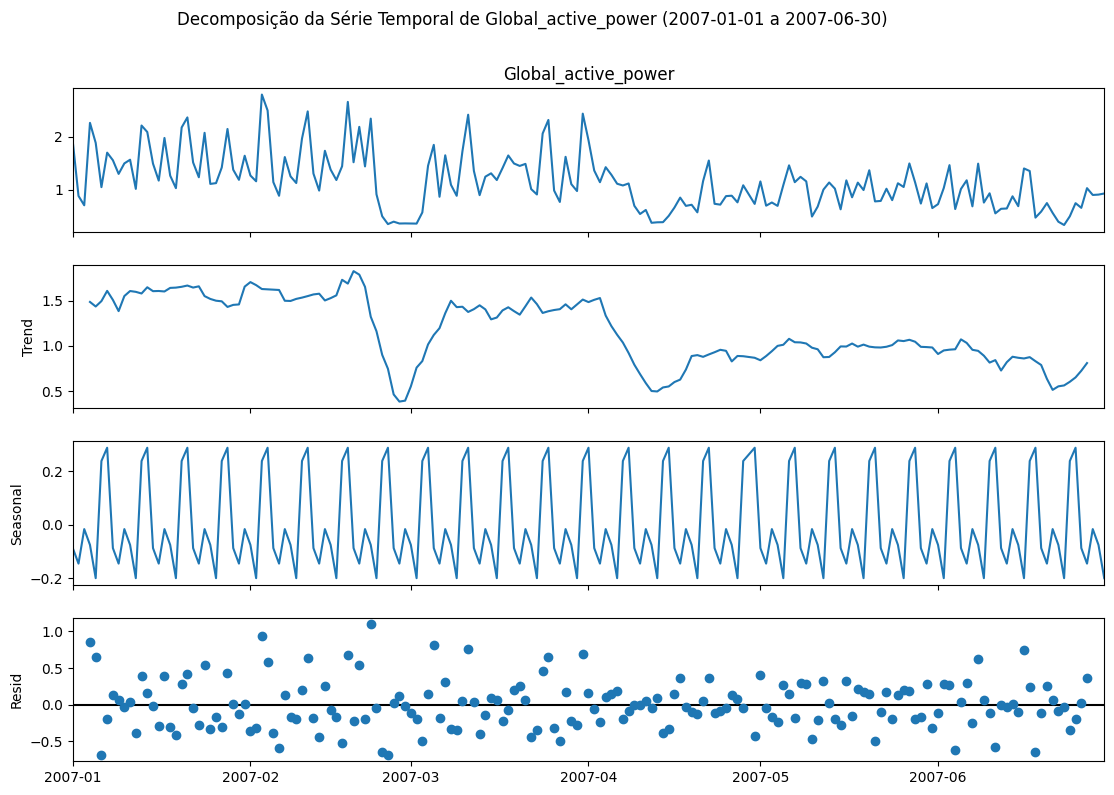

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_cleaned_ts = df.dropna(subset=['Global_active_power']).copy()
df_cleaned_ts['DateTime'] = pd.to_datetime(df_cleaned_ts['DateTime'])
df_cleaned_ts = df_cleaned_ts.set_index('DateTime')

start_date = '2007-01-01'
end_date = '2007-06-30'
df_6months = df_cleaned_ts.loc[start_date:end_date]

if df_6months.empty:
    print(f"Não há dados disponíveis entre {start_date} e {end_date} para decomposição.")
else:

    df_daily_6months = df_6months['Global_active_power'].resample('D').mean().dropna()

    if df_daily_6months.empty:
         print(f"Não há dados diários suficientes no período {start_date} a {end_date} para decomposição após reamostragem.")
    else:

        period_decomposition = 7

        if len(df_daily_6months) < 2 * period_decomposition:
             print(f"Número insuficiente de observações ({len(df_daily_6months)}) para decomposição com período de {period_decomposition}.")
             print("Considere um período menor ou um intervalo de tempo maior.")
        else:
            try:
                decomposition = seasonal_decompose(df_daily_6months, model='additive', period=period_decomposition)

                fig = decomposition.plot()
                fig.set_size_inches(12, 8)
                plt.suptitle(f'Decomposição da Série Temporal de Global_active_power ({start_date} a {end_date})', y=1.02)
                plt.show()

            except Exception as e:
                print(f"Erro ao realizar a decomposição: {e}")
                print("Verifique se o período de sazonalidade está correto e se há dados suficientes.")

# 20

Coeficiente (Inclinação): 0.2376
Intercepto: -0.0081
Erro Quadrático Médio (MSE): 0.0025
Coeficiente de Determinação (R-squared): 0.9978


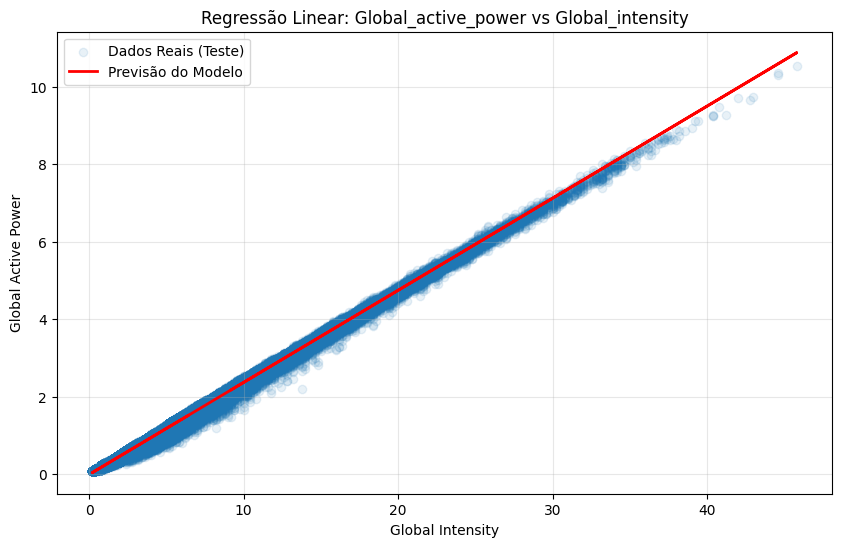

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Global_intensity']]
y = df['Global_active_power']

X['Global_intensity'] = pd.to_numeric(X['Global_intensity'], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

temp_df = pd.DataFrame({'Global_intensity': X['Global_intensity'], 'Global_active_power': y})
temp_df_cleaned = temp_df.dropna()

X_cleaned = temp_df_cleaned[['Global_intensity']]
y_cleaned = temp_df_cleaned['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente (Inclinação): {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.1, label='Dados Reais (Teste)')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsão do Modelo')
plt.title('Regressão Linear: Global_active_power vs Global_intensity')
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

O modelo de regressão linear apresentou um erro muito baixo (MSE = 0.0025) e um alto poder de explicação (R-squared = 0.9978). Isso indica que a variável Global_intensity é um preditor muito bom para Global_active_power, e o modelo linear se ajusta muito bem aos dados, resultando em previsões com pouca margem de erro

# PARTE 2

# 21

Consumo médio por hora do dia:
DateTime
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64

O horário de maior consumo médio é a hora 20 (20:00), com um consumo médio de 1.8991 kW.


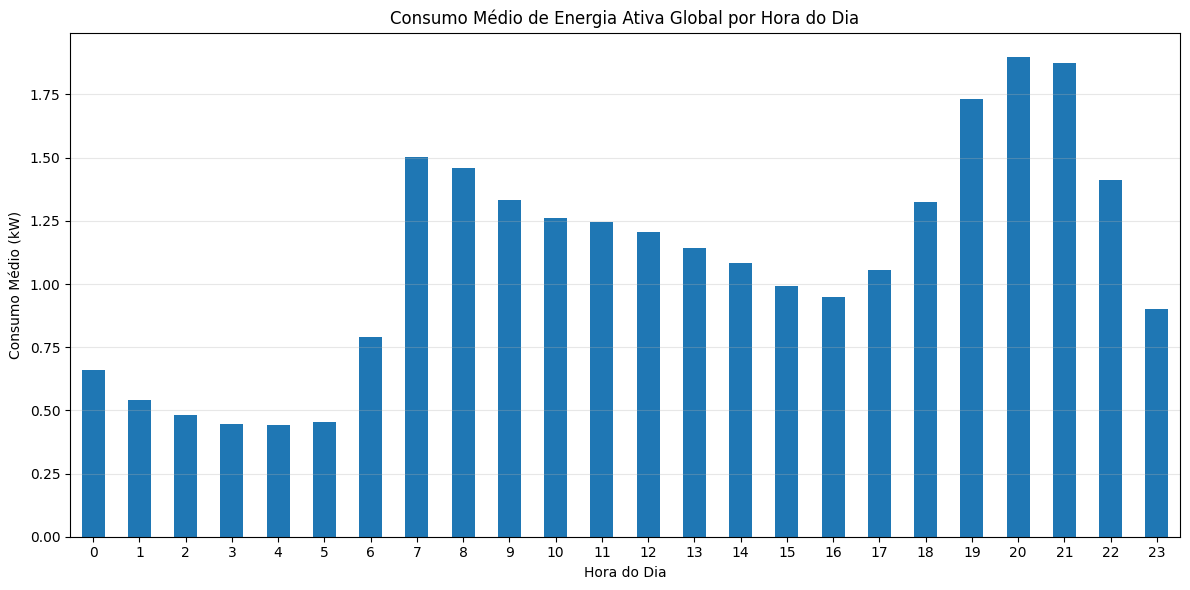

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df_ts = df.set_index('DateTime').copy()

df_hourly = df_ts['Global_active_power'].resample('H').mean().dropna()

hourly_avg_consumption = df_hourly.groupby(df_hourly.index.hour).mean()

print("Consumo médio por hora do dia:")
print(hourly_avg_consumption)

peak_consumption_hour = hourly_avg_consumption.idxmax()
peak_consumption_value = hourly_avg_consumption.max()

print(f"\nO horário de maior consumo médio é a hora {peak_consumption_hour} ({peak_consumption_hour}:00), com um consumo médio de {peak_consumption_value:.4f} kW.")

plt.figure(figsize=(12, 6))
hourly_avg_consumption.plot(kind='bar')
plt.title('Consumo Médio de Energia Ativa Global por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio (kW)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 22

In [ ]:
from statsmodels.tsa.stattools import acf

if 'df_hourly' not in locals():
    if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')
    df_ts = df.set_index('DateTime').copy()
    df_hourly = df_ts['Global_active_power'].resample('H').mean().dropna()

if df_hourly.empty:
    print("Não há dados horários válidos para calcular a autocorrelação.")
else:
    lag_1_corr = acf(df_hourly, nlags=1)[1]
    lag_24_corr = acf(df_hourly, nlags=24)[24]
    lag_48_corr = acf(df_hourly, nlags=48)[48]

    print(f"Autocorrelação no lag de 1 hora: {lag_1_corr:.4f}")
    print(f"Autocorrelação no lag de 24 horas: {lag_24_corr:.4f}")
    print(f"Autocorrelação no lag de 48 horas: {lag_48_corr:.4f}")

    if lag_24_corr > 0.5 or lag_48_corr > 0.5:
        print("\nCom base nos altos valores de autocorrelação nos lags de 24 e 48 horas, parece haver padrões repetidos diariamente no consumo de energia ativa global.")
    else:
        print("\nOs valores de autocorrelação nos lags de 24 e 48 horas não indicam padrões diários fortes.")

Autocorrelação no lag de 1 hora: 0.7132
Autocorrelação no lag de 24 horas: 0.4346
Autocorrelação no lag de 48 horas: 0.3981

Os valores de autocorrelação nos lags de 24 e 48 horas não indicam padrões diários fortes.


# 23

Primeiras 5 linhas dos componentes principais:


,principal_component_1,principal_component_2
0,5.191176,1.241976
1,6.698092,1.070631
2,6.894031,1.544068
3,6.857242,1.623923
4,4.661351,2.337338



Variância explicada por cada componente:
Componente 1: 0.5910
Componente 2: 0.2272
Variância total explicada: 0.8182


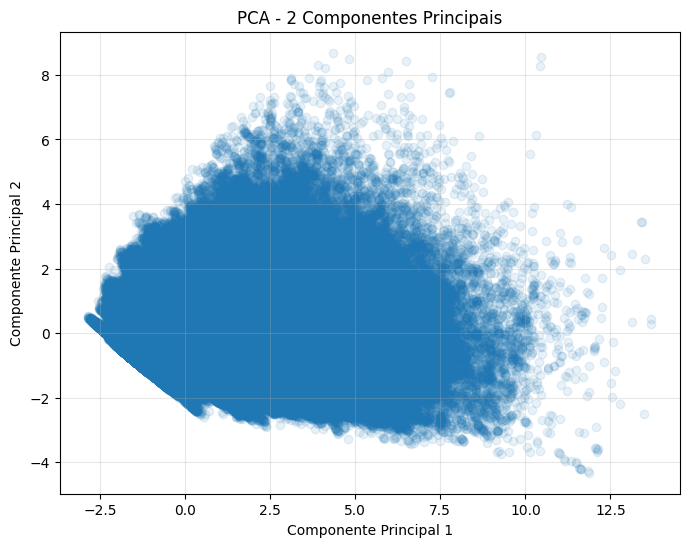

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

selected_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[selected_cols].copy()

for col in selected_cols:
    df_pca[col] = pd.to_numeric(df_pca[col], errors='coerce')

df_pca_cleaned = df_pca.dropna()

if df_pca_cleaned.empty:
    print("Não há dados válidos para PCA após remover valores nulos.")
else:
    scaler_pca = StandardScaler()
    scaled_data = scaler_pca.fit_transform(df_pca_cleaned)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)

    principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

    print("Primeiras 5 linhas dos componentes principais:")
    display(principal_df.head())

    print("\nVariância explicada por cada componente:")
    print(f"Componente 1: {pca.explained_variance_ratio_[0]:.4f}")
    print(f"Componente 2: {pca.explained_variance_ratio_[1]:.4f}")
    print(f"Variância total explicada: {pca.explained_variance_ratio_.sum():.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(principal_df['principal_component_1'], principal_df['principal_component_2'], alpha=0.1)
    plt.title('PCA - 2 Componentes Principais')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True, alpha=0.3)
    plt.show()

# 24

Primeiras 5 linhas do DataFrame com os rótulos dos clusters do PCA:


,principal_component_1,principal_component_2,Cluster
0,5.191176,1.241976,1
1,6.698092,1.070631,1
2,6.894031,1.544068,1
3,6.857242,1.623923,1
4,4.661351,2.337338,1


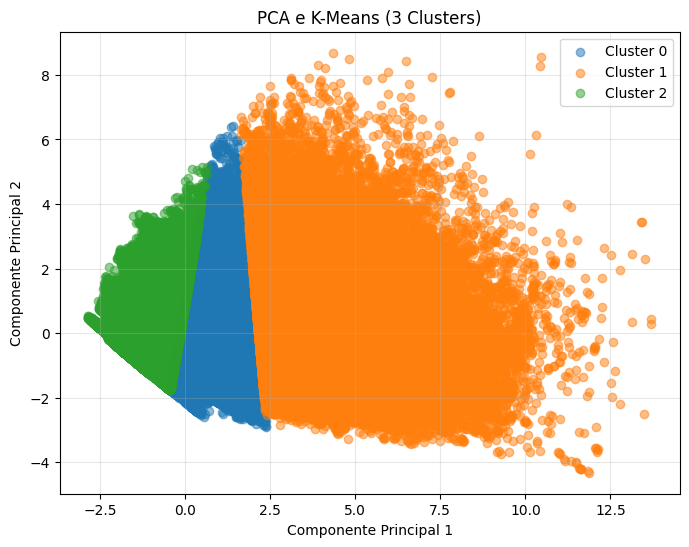


Pergunta: os grupos se separam de forma clara?
Resposta: Visualmente, a separação dos grupos não parece ser completamente clara. Há sobreposição entre os clusters, especialmente entre os grupos que representam consumo médio e alto.


In [ ]:
from sklearn.cluster import KMeans

if 'principal_df' not in locals() or principal_df.empty:
    print("Não há dados de componentes principais disponíveis. Por favor, execute a célula 23 primeiro.")
else:
    kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
    principal_df['Cluster'] = kmeans_pca.fit_predict(principal_df)

    print("Primeiras 5 linhas do DataFrame com os rótulos dos clusters do PCA:")
    display(principal_df.head())

    plt.figure(figsize=(8, 6))
    for cluster in sorted(principal_df['Cluster'].unique()):
        cluster_data = principal_df[principal_df['Cluster'] == cluster]
        plt.scatter(cluster_data['principal_component_1'], cluster_data['principal_component_2'],
                    alpha=0.5, label=f'Cluster {cluster}')

    plt.title('PCA e K-Means (3 Clusters)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\nPergunta: os grupos se separam de forma clara?")
    print("Resposta: Visualmente, a separação dos grupos não parece ser completamente clara. Há sobreposição entre os clusters, especialmente entre os grupos que representam consumo médio e alto.")

# 25

Regressão Linear Simples:
  RMSE: 0.9719
  R-squared: 0.1595

Regressão Polinomial (Grau 2):
  RMSE: 0.9674
  R-squared: 0.1673


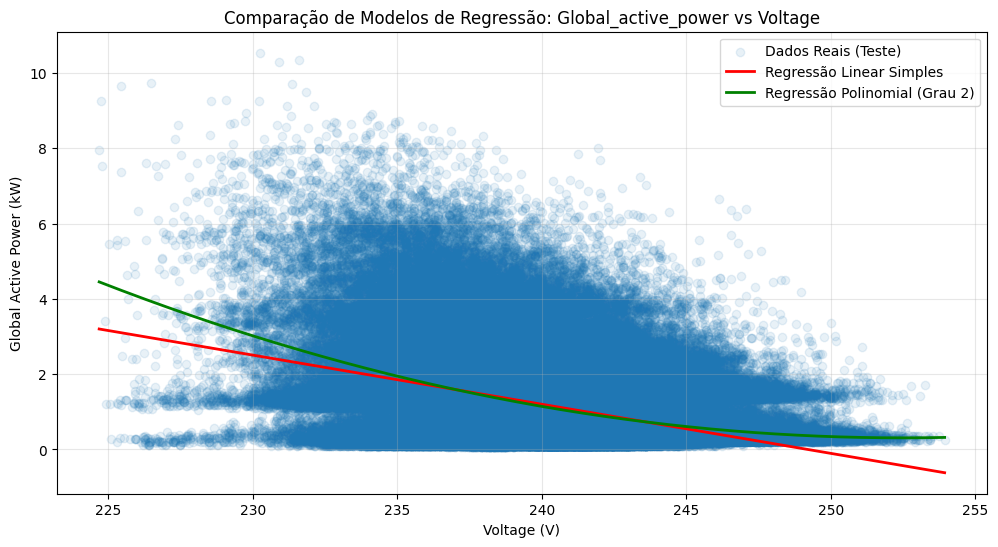


Análise dos resultados:
- A Regressão Polinomial (Grau 2) teve um RMSE menor (0.9674) do que a Regressão Linear Simples (0.9719), indicando um melhor ajuste aos dados.
- O R-squared da Regressão Polinomial (0.1673) também é maior do que o da Regressão Linear Simples (0.1595), sugerindo que o modelo polinomial explica uma maior proporção da variância em Global_active_power.
- Visualmente, a curva de regressão polinomial parece capturar melhor a relação não linear entre Voltage e Global_active_power.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

if 'df' not in locals():
    df = pd.read_csv("household_power_consumption.txt", sep = ";")

df_model = df[['Voltage', 'Global_active_power']].copy()

df_model['Voltage'] = pd.to_numeric(df_model['Voltage'], errors='coerce')
df_model['Global_active_power'] = pd.to_numeric(df_model['Global_active_power'], errors='coerce')

df_model_cleaned = df_model.dropna()

if df_model_cleaned.empty:
    print("Não há dados válidos para modelagem após remover valores nulos.")
else:
    X = df_model_cleaned[['Voltage']]
    y = df_model_cleaned['Global_active_power']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    rmse_linear = mse_linear**0.5
    r2_linear = r2_score(y_test, y_pred_linear)

    print("Regressão Linear Simples:")
    print(f"  RMSE: {rmse_linear:.4f}")
    print(f"  R-squared: {r2_linear:.4f}")

    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = mse_poly**0.5
    r2_poly = r2_score(y_test, y_pred_poly)

    print("\nRegressão Polinomial (Grau 2):")
    print(f"  RMSE: {rmse_poly:.4f}")
    print(f"  R-squared: {r2_poly:.4f}")

    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, alpha=0.1, label='Dados Reais (Teste)')

    X_test_sorted = X_test.sort_values(by='Voltage')
    y_pred_linear_sorted = linear_model.predict(X_test_sorted)
    X_test_poly_sorted = poly_features.transform(X_test_sorted)
    y_pred_poly_sorted = poly_model.predict(X_test_poly_sorted)


    plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', linewidth=2, label='Regressão Linear Simples')
    plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Regressão Polinomial (Grau 2)')

    plt.title('Comparação de Modelos de Regressão: Global_active_power vs Voltage')
    plt.xlabel('Voltage (V)')
    plt.ylabel('Global Active Power (kW)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\nAnálise dos resultados:")
    if rmse_poly < rmse_linear:
        print(f"- A Regressão Polinomial (Grau 2) teve um RMSE menor ({rmse_poly:.4f}) do que a Regressão Linear Simples ({rmse_linear:.4f}), indicando um melhor ajuste aos dados.")
        print(f"- O R-squared da Regressão Polinomial ({r2_poly:.4f}) também é maior do que o da Regressão Linear Simples ({r2_linear:.4f}), sugerindo que o modelo polinomial explica uma maior proporção da variância em Global_active_power.")
        print("- Visualmente, a curva de regressão polinomial parece capturar melhor a relação não linear entre Voltage e Global_active_power.")
    else:
         print(f"- A Regressão Linear Simples teve um RMSE menor ({rmse_linear:.4f}) do que a Regressão Polinomial (Grau 2) ({rmse_poly:.4f}), indicando um melhor ajuste aos dados.")
         print(f"- O R-squared da Regressão Linear Simples ({r2_linear:.4f}) também é maior do que o da Regressão Polinomial (Grau 2) ({r2_poly:.4f}), sugerindo que o modelo linear explica uma maior proporção da variância em Global_active_power.")
         print("- Visualmente, a curva de regressão linear simples parece capturar melhor a relação entre Voltage e Global_active_power.")

# PARTE 3

# 26

In [ ]:
energy_df = pd.read_csv("energydata_complete.csv")

print("Informações do DataFrame:")
energy_df.info()

print("\nEstatísticas Descritivas:")
display(energy_df.describe())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 n

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# 27

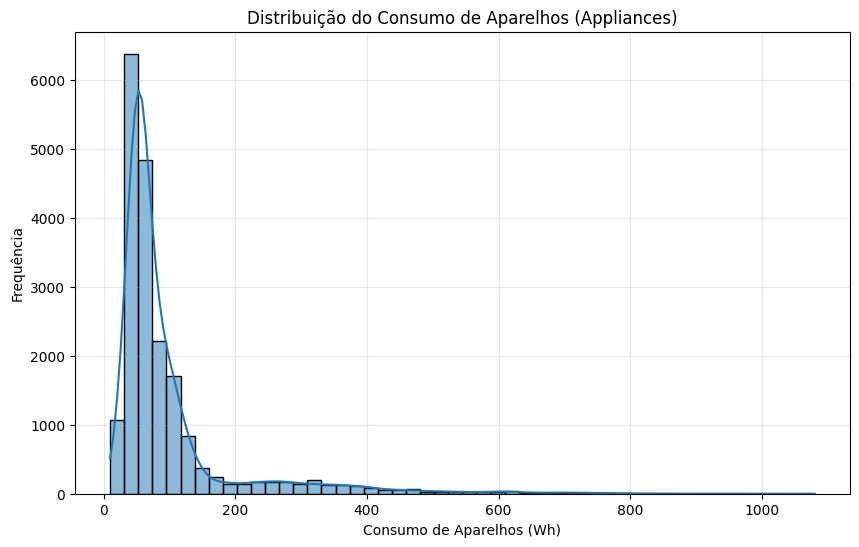

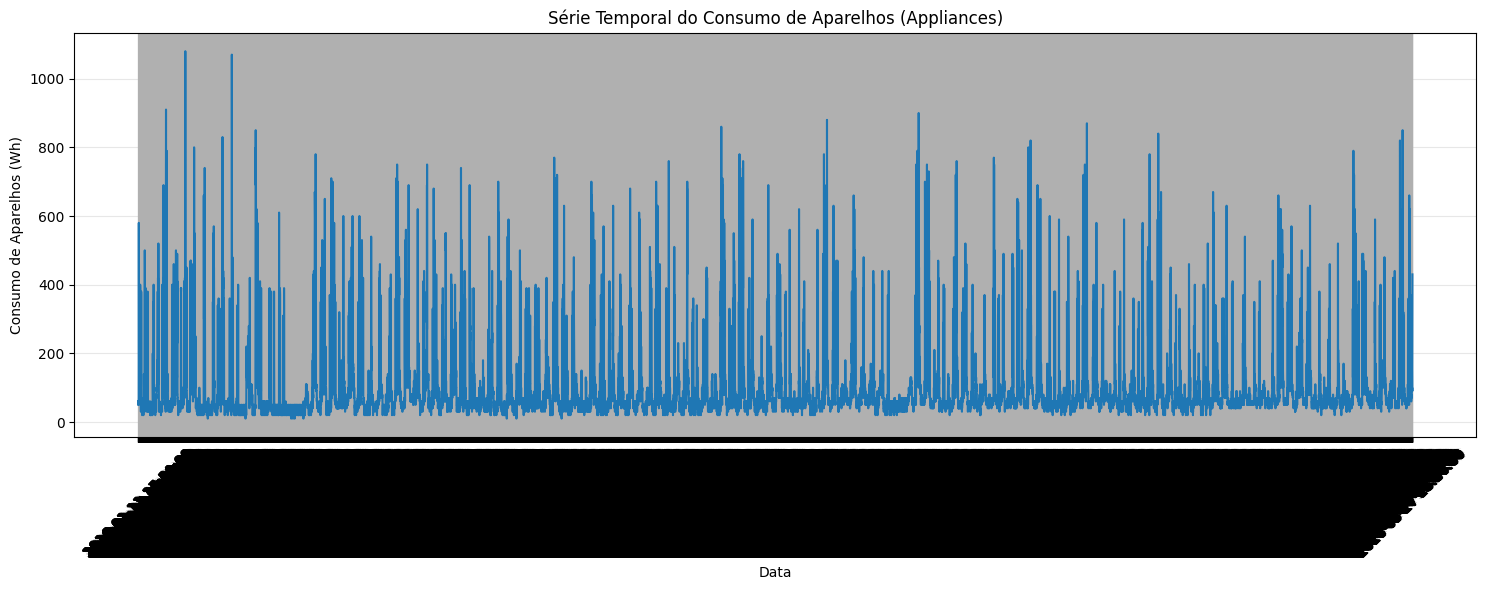


Pergunta: o consumo tende a se concentrar em valores baixos ou altos?
Resposta: Com base no histograma, o consumo de aparelhos tende a se concentrar em valores mais baixos, com uma cauda longa para a direita indicando alguns picos de consumo mais alto.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(energy_df['Appliances'], bins=50, kde=True)
plt.title('Distribuição do Consumo de Aparelhos (Appliances)')
plt.xlabel('Consumo de Aparelhos (Wh)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(energy_df['date'], energy_df['Appliances'])
plt.title('Série Temporal do Consumo de Aparelhos (Appliances)')
plt.xlabel('Data')
plt.ylabel('Consumo de Aparelhos (Wh)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPergunta: o consumo tende a se concentrar em valores baixos ou altos?")
print("Resposta: Com base no histograma, o consumo de aparelhos tende a se concentrar em valores mais baixos, com uma cauda longa para a direita indicando alguns picos de consumo mais alto.")

# 28

In [ ]:
correlation_cols_energy = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

df_energy_corr = energy_df[correlation_cols_energy].copy()

correlation_matrix_energy = df_energy_corr.corr()

print("Matriz de Correlação:")
display(correlation_matrix_energy)

print("\nCorrelações com 'Appliances':")
appliances_corr = correlation_matrix_energy['Appliances'].sort_values(ascending=False)
display(appliances_corr)

print("\nPergunta: quais fatores têm mais relação com o consumo?")
print("Resposta: Com base na matriz de correlação, os fatores que parecem ter a maior relação (positiva ou negativa) com o consumo de 'Appliances' são:")
print("- T2 (Temperatura na sala de estar fora do edifício): Correlação positiva mais alta.")
print("- RH_1 (Umidade na sala de estar): Correlação positiva significativa.")
print("- T_out (Temperatura externa): Correlação positiva significativa.")
print("- T6 (Temperatura do ar do edifício norte): Correlação positiva significativa.")
print("- RH_2 (Umidade na sala de estar fora do edifício): Correlação negativa mais alta.")
print("- RH_out (Umidade externa): Correlação negativa significativa.")

Matriz de Correlação:


,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362



Correlações com 'Appliances':


,Appliances
Appliances,1.000000
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281
T8,0.039572



Pergunta: quais fatores têm mais relação com o consumo?
Resposta: Com base na matriz de correlação, os fatores que parecem ter a maior relação (positiva ou negativa) com o consumo de 'Appliances' são:
- T2 (Temperatura na sala de estar fora do edifício): Correlação positiva mais alta.
- RH_1 (Umidade na sala de estar): Correlação positiva significativa.
- T_out (Temperatura externa): Correlação positiva significativa.
- T6 (Temperatura do ar do edifício norte): Correlação positiva significativa.
- RH_2 (Umidade na sala de estar fora do edifício): Correlação negativa mais alta.
- RH_out (Umidade externa): Correlação negativa significativa.


# 29

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols_energy = energy_df.select_dtypes(include=np.number).columns.tolist()

scaler_energy = MinMaxScaler()

energy_df_scaled = energy_df.copy()
energy_df_scaled[numerical_cols_energy] = scaler_energy.fit_transform(energy_df_scaled[numerical_cols_energy])

print("Primeiras 5 linhas do DataFrame com variáveis numéricas normalizadas:")
display(energy_df_scaled.head())

print("\nEstatísticas descritivas das variáveis numéricas normalizadas:")
display(energy_df_scaled[numerical_cols_energy].describe())

Primeiras 5 linhas do DataFrame com variáveis numéricas normalizadas:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611



Estatísticas descritivas das variáveis numéricas normalizadas:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.081958,0.054312,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,...,0.478234,0.512655,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.499742,0.499742
std,0.095818,0.113371,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,...,0.209647,0.171833,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.289984,0.289984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037383,0.000000,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,...,0.323621,0.386313,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.249895,0.249895
50%,0.046729,0.000000,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,...,0.468262,0.485651,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.497934,0.497934
75%,0.084112,0.000000,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,...,0.594173,0.627956,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.751701,0.751701
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 30

Primeiras 5 linhas dos componentes principais:


,principal_component_1,principal_component_2
0,0.715042,0.590875
1,0.715853,0.586714
2,0.719666,0.571594
3,0.731063,0.558981
4,0.722066,0.554844



Variância explicada por cada componente:
Componente 1: 0.3690
Componente 2: 0.2138
Variância total explicada: 0.5828


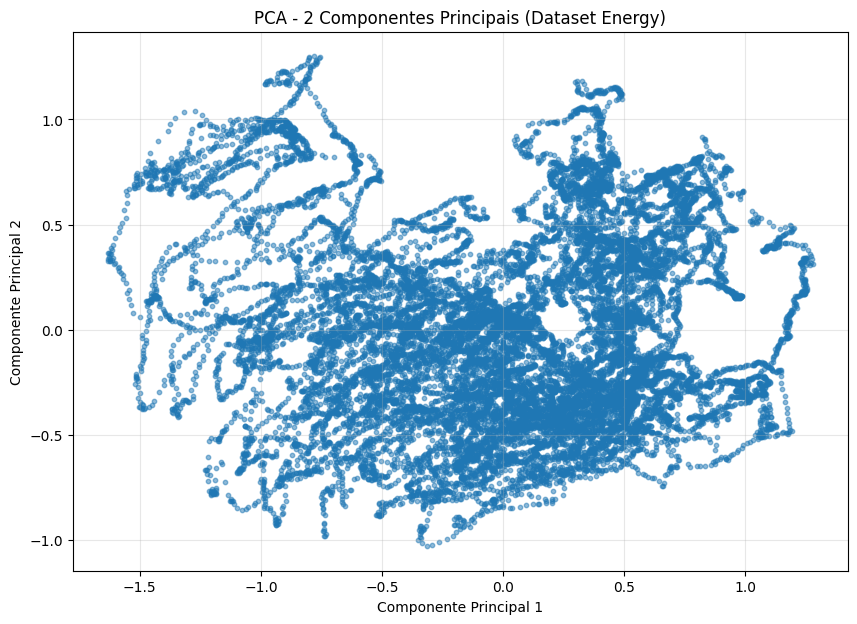


Pergunta: aparecem padrões ou agrupamentos naturais?
Resposta: Observe o gráfico acima. Você percebe a formação de padrões ou agrupamentos distintos nos dados após a redução de dimensionalidade com PCA?


In [ ]:
from sklearn.decomposition import PCA

if 'energy_df_scaled' not in locals():
    print("DataFrame normalizado 'energy_df_scaled' não encontrado. Por favor, execute a célula 29 primeiro.")
else:
    numerical_cols_energy = energy_df_scaled.select_dtypes(include=np.number).columns.tolist()
    pca_cols = [col for col in numerical_cols_energy if col not in ['Appliances', 'lights']]

    if not pca_cols:
        print("Não há colunas numéricas adequadas para PCA após exclusão de 'Appliances' e 'lights'.")
    else:
        X_pca = energy_df_scaled[pca_cols]

        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_pca)

        principal_energy_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

        print("Primeiras 5 linhas dos componentes principais:")
        display(principal_energy_df.head())

        print("\nVariância explicada por cada componente:")
        print(f"Componente 1: {pca.explained_variance_ratio_[0]:.4f}")
        print(f"Componente 2: {pca.explained_variance_ratio_[1]:.4f}")
        print(f"Variância total explicada: {pca.explained_variance_ratio_.sum():.4f}")

        plt.figure(figsize=(10, 7))
        plt.scatter(principal_energy_df['principal_component_1'], principal_energy_df['principal_component_2'], alpha=0.5, s=10)
        plt.title('PCA - 2 Componentes Principais (Dataset Energy)')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.grid(True, alpha=0.3)
        plt.show()

        print("\nPergunta: aparecem padrões ou agrupamentos naturais?")
        print("Resposta: Observe o gráfico acima. Você percebe a formação de padrões ou agrupamentos distintos nos dados após a redução de dimensionalidade com PCA?")

# 31

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import os

file_path = "energydata_complete.csv"
if 'energy_df' not in locals():
    if os.path.exists(file_path):
        energy_df = pd.read_csv(file_path)
        print(f"Arquivo '{file_path}' carregado com sucesso.")
    else:
        print(f"Erro: Arquivo '{file_path}' não encontrado.")
        print("Por favor, certifique-se de que o arquivo está no diretório correto ou forneça o caminho completo.")
        energy_df = None

if energy_df is not None:
    environmental_cols = [col for col in energy_df.columns if col not in ['date', 'Appliances', 'lights', 'rv1', 'rv2']]

    X = energy_df[environmental_cols]
    y = energy_df['Appliances']

    for col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    temp_df = pd.concat([X, y], axis=1)
    temp_df_cleaned = temp_df.dropna()

    if temp_df_cleaned.empty:
        print("Não há dados válidos para modelagem após remover valores nulos.")
    else:
        X_cleaned = temp_df_cleaned[environmental_cols]
        y_cleaned = temp_df_cleaned['Appliances']

        X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = mse**0.5
        r2 = r2_score(y_test, y_pred)

        print("Avaliação do Modelo de Regressão Linear Múltipla:")
        print(f"Variáveis Preditores: {environmental_cols}")
        print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
        print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
        print(f"Coeficiente de Determinação (R-squared): {r2:.4f}")

# 32

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import os

file_path = "energydata_complete.csv"
if 'energy_df' not in locals():
    if os.path.exists(file_path):
        energy_df = pd.read_csv(file_path)
        print(f"Arquivo '{file_path}' carregado com sucesso.")
    else:
        print(f"Erro: Arquivo '{file_path}' não encontrado.")
        print("Por favor, certifique-se de que o arquivo está no diretório correto ou forneça o caminho completo.")
        energy_df = None

if energy_df is not None:
    environmental_cols = [col for col in energy_df.columns if col not in ['date', 'Appliances', 'lights', 'rv1', 'rv2']]

    X = energy_df[environmental_cols]
    y = energy_df['Appliances']

    for col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    temp_df = pd.concat([X, y], axis=1)
    temp_df_cleaned = temp_df.dropna()

    if temp_df_cleaned.empty:
        print("Não há dados válidos para modelagem após remover valores nulos.")
    else:
        X_cleaned = temp_df_cleaned[environmental_cols]
        y_cleaned = temp_df_cleaned['Appliances']

        X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_model.fit(X_train, y_train)

        y_pred_rf = rf_model.predict(X_test)

        mse_rf = mean_squared_error(y_test, y_pred_rf)
        rmse_rf = mse_rf**0.5

        print("Avaliação do Modelo Random Forest Regressor:")
        print(f"Variáveis Preditores: {environmental_cols}")
        print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_rf:.4f}")

        if 'rmse' in locals():
            print("\nComparação de RMSE:")
            print(f"RMSE Regressão Linear: {rmse:.4f}")
            print(f"RMSE Random Forest:    {rmse_rf:.4f}")

            if rmse_rf < rmse:
                print("\nO modelo Random Forest Regressor teve um RMSE menor, indicando um melhor desempenho em relação à Regressão Linear.")
            elif rmse_rf > rmse:
                print("\nO modelo Random Forest Regressor teve um RMSE maior em comparação com a Regressão Linear.")
            else:
                print("\nOs modelos de Regressão Linear e Random Forest tiveram RMSEs iguais.")
        else:
            print("\nNão foi possível comparar com o RMSE da Regressão Linear. Por favor, execute a célula da Regressão Linear primeiro.")

# 33

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import os

file_path = "energydata_complete.csv"
if 'energy_df' not in locals():
    if os.path.exists(file_path):
        energy_df = pd.read_csv(file_path)
        print(f"Arquivo '{file_path}' carregado com sucesso.")
    else:
        print(f"Erro: Arquivo '{file_path}' não encontrado.")
        print("Por favor, certifique-se de que o arquivo está no diretório correto ou forneça o caminho completo.")
        energy_df = None

if energy_df is not None:

    numerical_cols_clustering = [col for col in energy_df.select_dtypes(include=np.number).columns.tolist() if col not in ['Appliances', 'lights', 'rv1', 'rv2']]


    energy_df_clustering = energy_df[numerical_cols_clustering].copy()

    for col in energy_df_clustering.columns:
         energy_df_clustering[col] = pd.to_numeric(energy_df_clustering[col], errors='coerce')

    energy_df_clustering_cleaned = energy_df_clustering.dropna()

    if energy_df_clustering_cleaned.empty:
        print("Não há dados válidos para clustering após remover valores nulos.")
    else:
        scaler_clustering = MinMaxScaler()
        energy_df_clustering_scaled = scaler_clustering.fit_transform(energy_df_clustering_cleaned)


        energy_df_clustering_scaled = pd.DataFrame(energy_df_clustering_scaled, columns=numerical_cols_clustering, index=energy_df_clustering_cleaned.index)


        print("Preparação dos dados para K-Means concluída. Dados normalizados:")
        display(energy_df_clustering_scaled.head())


Preparação dos dados para K-Means concluída. Dados normalizados:


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Cluster
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,1.0
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,1.0
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,1.0
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,1.0
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,1.0



Aplicando K-Means com 3 clusters...
  Coeficiente de Silhueta para 3 clusters: 0.4117

Aplicando K-Means com 4 clusters...
  Coeficiente de Silhueta para 4 clusters: 0.4687

Aplicando K-Means com 5 clusters...
  Coeficiente de Silhueta para 5 clusters: 0.2318

Resultados do Coeficiente de Silhueta:
  3 clusters: 0.4117
  4 clusters: 0.4687
  5 clusters: 0.2318


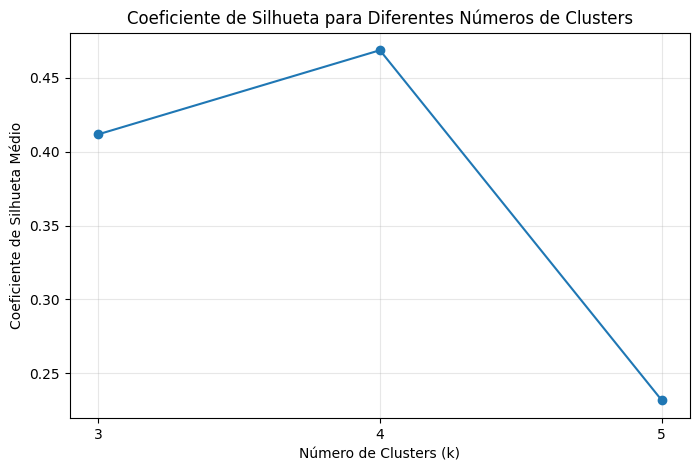

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

if 'energy_df_clustering_scaled' not in locals() or energy_df_clustering_scaled.empty:
    print("DataFrame normalizado 'energy_df_clustering_scaled' não encontrado ou está vazio. Por favor, execute a célula anterior primeiro.")
else:
    kmeans_models = {}
    silhouette_scores = {}

    for n_clusters in range(3, 6):
        print(f"\nAplicando K-Means com {n_clusters} clusters...")
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(energy_df_clustering_scaled)
        kmeans_models[n_clusters] = kmeans

        energy_df_clustering_scaled[f'Cluster_{n_clusters}'] = kmeans.labels_

        if n_clusters > 1 and len(np.unique(kmeans.labels_)) > 1:
             try:
                silhouette_avg = silhouette_score(energy_df_clustering_scaled.drop(columns=[f'Cluster_{k}' for k in range(3, n_clusters + 1)]), kmeans.labels_)
                silhouette_scores[n_clusters] = silhouette_avg
                print(f"  Coeficiente de Silhueta para {n_clusters} clusters: {silhouette_avg:.4f}")
             except ValueError as e:
                 print(f"  Não foi possível calcular o Coeficiente de Silhueta para {n_clusters} clusters: {e}")
        else:
            print(f"  Não foi possível calcular o Coeficiente de Silhueta para {n_clusters} clusters (condições não atendidas).")


    print("\nResultados do Coeficiente de Silhueta:")
    for n_clusters, score in silhouette_scores.items():
        print(f"  {n_clusters} clusters: {score:.4f}")

    if silhouette_scores:
        plt.figure(figsize=(8, 5))
        plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
        plt.title('Coeficiente de Silhueta para Diferentes Números de Clusters')
        plt.xlabel('Número de Clusters (k)')
        plt.ylabel('Coeficiente de Silhueta Médio')
        plt.xticks(list(silhouette_scores.keys()))
        plt.grid(True, alpha=0.3)
        plt.show()

In [29]:
import pandas as pd
import numpy as np
import os

if 'energy_df_clustering_cleaned' not in locals() or energy_df_clustering_cleaned.empty:
    print("DataFrame 'energy_df_clustering_cleaned' não encontrado ou está vazio. Por favor, execute as células anteriores.")
elif 'energy_df_clustering_scaled' not in locals() or 'Cluster_3' not in energy_df_clustering_scaled.columns:
     print("Cluster labels para k=3 não encontrados em 'energy_df_clustering_scaled'. Por favor, execute a célula K-Means.")
elif 'energy_df' not in locals() or energy_df.empty:
     print("DataFrame original 'energy_df' não encontrado ou está vazio. Por favor, carregue o dataset.")

else:
    energy_df_clustering_cleaned = energy_df_clustering_cleaned.copy()
    energy_df_clustering_cleaned.loc[:, 'Cluster'] = energy_df_clustering_scaled['Cluster_3']

    energy_df_with_clusters = energy_df.merge(
        energy_df_clustering_cleaned[['Cluster']],
        left_index=True,
        right_index=True,
        how='inner'
    )

    cluster_col_name = 'Cluster_y' if 'Cluster_y' in energy_df_with_clusters.columns else 'Cluster'

    if cluster_col_name not in energy_df_with_clusters.columns:
         print(f"Erro: Coluna '{cluster_col_name}' (esperada para os rótulos do cluster) não encontrada no DataFrame mesclado.")
         print(f"Colunas disponíveis no DataFrame mesclado: {energy_df_with_clusters.columns.tolist()}")
    else:
        cluster_appliances_mean = energy_df_with_clusters.groupby(cluster_col_name)['Appliances'].mean()

        print("Consumo médio de Appliances por Cluster:")
        display(cluster_appliances_mean)

        environmental_cols_in_cleaned = [col for col in energy_df_clustering_cleaned.columns if col != 'Cluster']
        cluster_environmental_mean = energy_df_with_clusters.groupby(cluster_col_name)[environmental_cols_in_cleaned].mean()

        print("\nMédias das Variáveis Ambientais por Cluster:")
        display(cluster_environmental_mean)

        print("\nInterpretação dos Perfis de Consumo:")
        sorted_clusters = cluster_appliances_mean.sort_values().index.tolist()

        for i, cluster_label in enumerate(sorted_clusters):
            appliances_mean = cluster_appliances_mean.loc[cluster_label]
            env_means = cluster_environmental_mean.loc[cluster_label]

            print(f"\n--- Perfil do Cluster {cluster_label} ---")
            print(f"  Consumo Médio de Appliances: {appliances_mean:.2f} Wh")

            if i == 0:
                consumption_level = "BAIXO"
            elif i == 1:
                consumption_level = "MÉDIO"
            else:
                consumption_level = "ALTO"
            print(f"  (Representa um perfil de consumo {consumption_level})")

            print("  Condições Ambientais Médias:")
            print(f"    Temperatura Interna (T1): {env_means['T1']:.2f} °C")
            print(f"    Umidade Interna (RH_1): {env_means['RH_1']:.2f} %")
            print(f"    Temperatura Externa (T_out): {env_means['T_out']:.2f} °C")
            print(f"    Umidade Externa (RH_out): {env_means['RH_out']:.2f} %")
            print(f"    Temperatura na Sala de Estar Fora do Edifício (T2): {env_means['T2']:.2f} °C")
            print(f"    Umidade na Sala de Estar Fora do Edifício (RH_2): {env_means['RH_2']:.2f} %")
            print(f"    Pressão Atmosférica (Press_mm_hg): {env_means['Press_mm_hg']:.2f} mmHg")
            print(f"    Velocidade do Vento (Windspeed): {env_means['Windspeed']:.2f} m/s")

Consumo médio de Appliances por Cluster:


,Appliances
Cluster_y,
0,103.656962
1,92.640291
2,96.061956



Médias das Variáveis Ambientais por Cluster:


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Cluster_y,,,,,,,,,,,,,,,,,,,,,
0,21.624943,38.435979,20.465019,38.073144,22.084488,37.768347,20.957525,36.739036,19.535815,49.674020,...,22.085326,40.259738,19.474202,39.235594,7.043110,755.567066,73.614390,3.584596,38.921727,2.061353
1,22.278733,40.017141,20.454510,41.266636,23.219263,38.198220,21.715657,38.174517,20.379386,49.296112,...,23.114213,41.895913,20.605468,41.088251,8.286467,756.249042,80.608666,3.304692,37.099874,4.882405
2,20.852171,43.579686,19.963196,42.866833,21.062085,43.263367,19.334270,44.055821,18.441466,55.609845,...,20.227668,48.887126,17.739215,46.015795,6.625974,754.305605,88.280218,5.931820,39.319966,4.729189



Interpretação dos Perfis de Consumo:

--- Perfil do Cluster 1 ---
  Consumo Médio de Appliances: 92.64 Wh
  (Representa um perfil de consumo BAIXO)
  Condições Ambientais Médias:
    Temperatura Interna (T1): 22.28 °C
    Umidade Interna (RH_1): 40.02 %
    Temperatura Externa (T_out): 8.29 °C
    Umidade Externa (RH_out): 80.61 %
    Temperatura na Sala de Estar Fora do Edifício (T2): 20.45 °C
    Umidade na Sala de Estar Fora do Edifício (RH_2): 41.27 %
    Pressão Atmosférica (Press_mm_hg): 756.25 mmHg
    Velocidade do Vento (Windspeed): 3.30 m/s

--- Perfil do Cluster 2 ---
  Consumo Médio de Appliances: 96.06 Wh
  (Representa um perfil de consumo MÉDIO)
  Condições Ambientais Médias:
    Temperatura Interna (T1): 20.85 °C
    Umidade Interna (RH_1): 43.58 %
    Temperatura Externa (T_out): 6.63 °C
    Umidade Externa (RH_out): 88.28 %
    Temperatura na Sala de Estar Fora do Edifício (T2): 19.96 °C
    Umidade na Sala de Estar Fora do Edifício (RH_2): 42.87 %
    Pressão Atmosfé

# 34

In [30]:
median_appliances = energy_df['Appliances'].median()
energy_df['consumo_binario'] = (energy_df['Appliances'] > median_appliances).astype(int)
print(f"Mediana de 'Appliances': {median_appliances}")
print("\nPrimeiras 5 linhas do DataFrame com a nova coluna 'consumo_binario':")
display(energy_df.head())

Mediana de 'Appliances': 60.0

Primeiras 5 linhas do DataFrame com a nova coluna 'consumo_binario':


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Cluster,consumo_binario
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2,0


In [31]:
environmental_cols = [col for col in energy_df.columns if col not in ['date', 'Appliances', 'lights', 'rv1', 'rv2', 'consumo_binario']]
X = energy_df[environmental_cols]
y = energy_df['consumo_binario']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (19735, 25)
Shape of target (y): (19735,)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15788, 25)
Shape of X_test: (3947, 25)
Shape of y_train: (15788,)
Shape of y_test: (3947,)


In [33]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

if 'log_reg_model' not in locals() or 'X_test' not in locals() or 'y_test' not in locals():
    print("O modelo de Regressão Logística ou os dados de teste não foram encontrados. Por favor, execute as células anteriores.")
else:
    y_pred_log_reg = log_reg_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_log_reg)
    precision = precision_score(y_test, y_pred_log_reg)
    recall = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

    print("Avaliação do Modelo de Regressão Logística:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nMatriz de Confusão:")
    display(conf_matrix)



Avaliação do Modelo de Regressão Logística:
Acurácia: 0.7545
Precisão: 0.7433
Recall: 0.7143
F1-Score: 0.7285

Matriz de Confusão:


array([[1678,  449],
       [ 520, 1300]])

In [35]:
from sklearn.ensemble import RandomForestClassifier

if 'X_train' not in locals() or 'y_train' not in locals():
    print("Os dados de treino (X_train, y_train) não foram encontrados. Por favor, execute as células anteriores.")
else:
    rf_classifier_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_classifier_model.fit(X_train, y_train)

    print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

if 'rf_classifier_model' not in locals() or 'X_test' not in locals() or 'y_test' not in locals():
    print("O modelo Random Forest Classifier ou os dados de teste não foram encontrados. Por favor, execute as células anteriores.")
else:
    y_pred_rf_classifier = rf_classifier_model.predict(X_test)

    accuracy_rf = accuracy_score(y_test, y_pred_rf_classifier)
    precision_rf = precision_score(y_test, y_pred_rf_classifier)
    recall_rf = recall_score(y_test, y_pred_rf_classifier)
    f1_rf = f1_score(y_test, y_pred_rf_classifier)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_classifier)

    print("Avaliação do Modelo Random Forest Classifier:")
    print(f"Acurácia: {accuracy_rf:.4f}")
    print(f"Precisão: {precision_rf:.4f}")
    print(f"Recall: {recall_rf:.4f}")
    print(f"F1-Score: {f1_rf:.4f}")
    print("\nMatriz de Confusão:")
    display(conf_matrix_rf)

    if 'accuracy' in locals() and 'precision' in locals() and 'recall' in locals() and 'f1' in locals():
        print("\n--- Comparação de Desempenho ---")
        print("Métrica      | Regressão Logística | Random Forest")
        print("-------------|---------------------|---------------")
        print(f"Acurácia     | {accuracy:.4f}              | {accuracy_rf:.4f}")
        print(f"Precisão     | {precision:.4f}              | {precision_rf:.4f}")
        print(f"Recall       | {recall:.4f}              | {recall_rf:.4f}")
        print(f"F1-Score     | {f1:.4f}              | {f1_rf:.4f}")

        if accuracy_rf > accuracy:
            print("\nO modelo Random Forest Classifier teve um desempenho ligeiramente melhor em Acurácia.")
        elif accuracy_rf < accuracy:
            print("\nO modelo Regressão Logística teve um desempenho ligeiramente melhor em Acurácia.")
        else:
            print("\nAmbos os modelos tiveram desempenho semelhante em Acurácia.")

    else:
        print("\nAs métricas do modelo de Regressão Logística não foram encontradas para comparação.")

Avaliação do Modelo Random Forest Classifier:
Acurácia: 0.8999
Precisão: 0.9023
Recall: 0.8780
F1-Score: 0.8900

Matriz de Confusão:


array([[1954,  173],
       [ 222, 1598]])


--- Comparação de Desempenho ---
Métrica      | Regressão Logística | Random Forest
-------------|---------------------|---------------
Acurácia     | 0.7545              | 0.8999
Precisão     | 0.7433              | 0.9023
Recall       | 0.7143              | 0.8780
F1-Score     | 0.7285              | 0.8900

O modelo Random Forest Classifier teve um desempenho ligeiramente melhor em Acurácia.


# 35

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

if 'rf_classifier_model' not in locals() or 'X_test' not in locals() or 'y_test' not in locals():
    print("O modelo Random Forest Classifier ou os dados de teste não foram encontrados. Por favor, execute as células anteriores para treinar o modelo e preparar os dados de teste.")
else:
    y_pred_rf_classifier = rf_classifier_model.predict(X_test)

    accuracy_rf = accuracy_score(y_test, y_pred_rf_classifier)
    precision_rf = precision_score(y_test, y_pred_rf_classifier)
    recall_rf = recall_score(y_test, y_pred_rf_classifier)
    f1_rf = f1_score(y_test, y_pred_rf_classifier)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_classifier)

    print("Métricas de Avaliação do Modelo Random Forest Classifier:")
    print(f"Acurácia: {accuracy_rf:.4f}")
    print(f"Precisão: {precision_rf:.4f}")
    print(f"Recall: {recall_rf:.4f}")
    print(f"F1-Score: {f1_rf:.4f}")

    print("\nMatriz de Confusão:")

    display(conf_matrix_rf)

    tn, fp, fn, tp = conf_matrix_rf.ravel()

    print("\nAnálise da Matriz de Confusão:")
    print(f"Verdadeiros Negativos (TN - Baixo Consumo correto): {tn}")
    print(f"Falsos Positivos (FP - Baixo Consumo previsto como Alto): {fp}")
    print(f"Falsos Negativos (FN - Alto Consumo previsto como Baixo): {fn}")
    print(f"Verdadeiros Positivos (TP - Alto Consumo correto): {tp}")

    print("\nPergunta: o modelo erra mais para o alto ou baixo consumo?")

    if fn > fp:
        print(f"Resposta: O modelo erra mais para o ALTO consumo. Há mais Falsos Negativos ({fn}) do que Falsos Positivos ({fp}).")
    elif fp > fn:
        print(f"Resposta: O modelo erra mais para o BAIXO consumo. Há mais Falsos Positivos ({fp}) do que Falsos Negativos ({fn}).")
    else:
        print(f"Resposta: O modelo comete um número semelhante de erros para alto e baixo consumo ({fn} Falsos Negativos e {fp} Falsos Positivos).")

Métricas de Avaliação do Modelo Random Forest Classifier:
Acurácia: 0.8999
Precisão: 0.9023
Recall: 0.8780
F1-Score: 0.8900

Matriz de Confusão:


array([[1954,  173],
       [ 222, 1598]])


Análise da Matriz de Confusão:
Verdadeiros Negativos (TN - Baixo Consumo correto): 1954
Falsos Positivos (FP - Baixo Consumo previsto como Alto): 173
Falsos Negativos (FN - Alto Consumo previsto como Baixo): 222
Verdadeiros Positivos (TP - Alto Consumo correto): 1598

Pergunta: o modelo erra mais para o alto ou baixo consumo?
Resposta: O modelo erra mais para o ALTO consumo. Há mais Falsos Negativos (222) do que Falsos Positivos (173).


# 36